In [6]:
#import necessary packages
!apt-get -qq install python-cartopy python3-cartopy
import cartopy
!pip install pykrige
# Now let's import packages
import pandas as pd
import matplotlib.pyplot as plt
import pylab #using as a plotting library for spatial data, make contours
import numpy as np #gridded datasets and matrices; array package

# import cartopy, which we will use to map
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features


# import the UniversalKriging function from pykrige.uk 
from pykrige.uk import UniversalKriging

!pip install pyproj
from pyproj import Proj, transform

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Firas-95/GEO572-Project-E.St.Louis/class_example/yiquan/pumping/Modified_Pumpage_Data_ESL.csv') #read modified pumpage data

In [0]:
# drop lines with no latitude and longtitude records
list_drop = [] 
for ind, row in df.iterrows():
    if df.iloc[ind, 5:6].isnull().values.all():
        list_drop.append(ind)
df = df.drop(list_drop)

# drop data from other years except the years 1986 and 2013
df = df.drop(df.iloc[:,7:12],axis=1)
df = df.drop(df.iloc[:,8:34],axis=1)
df = df.drop(df.iloc[:,9:],axis=1)

In [0]:
illimap= {'proj': 'lcc', # Lambert Conformal Conic
     'ellps': 'clrk66', #Clarke 1866 ellipsoid
     'lon_0': -89.5, #Central Meridian
     'lat_0': 33, #Latitude of Origin
     'lat_1': 33, #Standard Parallel 1
     'lat_2': 45, #Standard Parallel 2
     'x_0': 2999994*0.3048006096012192, #starting x-coord. in ft, python expects m
     'y_0': 0} #starting y-coord.

inProj = Proj(illimap) #define input projection
outProj = pyproj.Proj('epsg:4326') #define output projection

In [67]:
Latitude=[] 
Longitude=[]
for index, row in df.iterrows():
  Long1,Lat1 = 0.3048006096012192*int(row['lam_x']),0.3048006096012192*int(row['lam_y']) #define input coordinates; convert lambert ft to m
  Long2,Lat2 = transform(inProj,outProj,Long1,Lat1) #convert from lambert to wgs84
  Latitude.append(Lat2) #add latitude data to empty Latitude=[] array
  Longitude.append(Long2) #add longitude data to empty Longitude=[] array
df['Latitude']=Latitude
df['Longitude']=Longitude
df2=df.drop(['lam_x','lam_y','owner','fac_well_num'],axis=1)
print(df2)

      p_num  isws_facility_id  depth_total_last_known  1986         2013  \
0    296811        11970015.0                    88.0   NaN          NaN   
3    314847        11938020.0                    90.0   NaN    2948000.0   
5    348353        13370020.0                    80.0   NaN   19008000.0   
6    400115        11990250.0                   112.0   NaN  153428895.0   
7    400116        11990250.0                   112.0   NaN  153428895.0   
..      ...               ...                     ...   ...          ...   
296  437027        11970015.0                    85.0   NaN          NaN   
297  442583        11994280.0                    98.0   NaN  141586170.0   
313  464421        13370001.0                    85.0   NaN          NaN   
323  465066        11938560.0                    41.1   NaN    3023483.0   
330  486823        13370009.0                    80.0   NaN          NaN   

      Latitude  Longitude  
0   -90.147063  38.661093  
3   -90.133395  38.878617  
5  

In [0]:
#Domain of project
sw_lat = 38.9167 #southwest latitude
sw_long =  -90.2333 #southwest longitude
ne_lat =  38.4833 #northeast latitude
ne_long = -89.9167 #northeast longitude

In [0]:
minlat = 38.4
maxlat = 39
minlong = -90.4
maxlong = -89.85

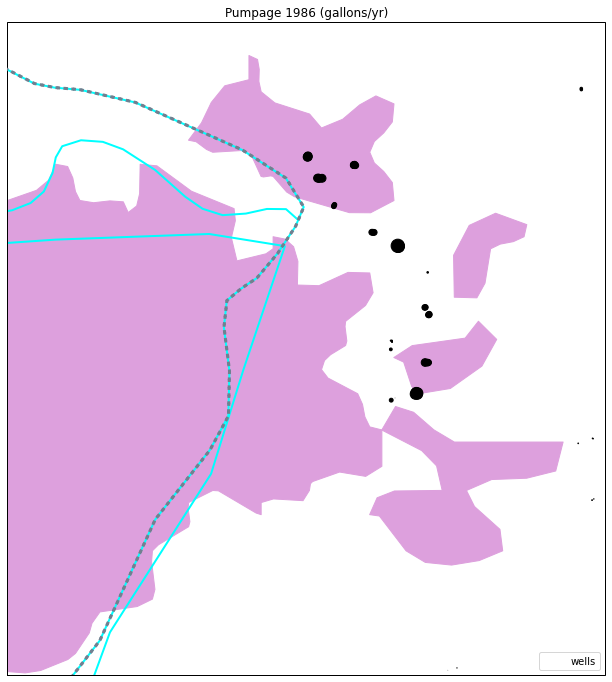

In [127]:
fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xlim(minlong,maxlong)
ax.set_ylim(minlat,maxlat)
states_provinces = cf.NaturalEarthFeature(
    category='cultural', # features are categorized as cultural or physical
    name='admin_1_states_provinces', # name of shapefile
    scale='10m', # scale of features
    facecolor='none')	
largerivers = cf.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='110m', # major rivers
    facecolor='none')
smallrivers = cf.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines_scale_rank',
    scale='10m', # smaller rivers
    facecolor='none')   
popplaces = cf.NaturalEarthFeature(
    category='cultural',
    name='urban_areas', # plots municipal boundaries
    scale='10m',
    facecolor='plum') 
# adds the features defined above
sz=(df['1986'].values/500000)
plt.scatter(df2['Latitude'],df2['Longitude'],sz, marker=".", color="black", label="wells",zorder=4)
ax.add_feature(popplaces,edgecolor='plum',linewidth=1.0, zorder=1)
ax.add_feature(largerivers,edgecolor='aqua',linewidth=2.0, zorder=2)
ax.add_feature(smallrivers,edgecolor='aqua',linewidth=2.0, zorder=2)
ax.add_feature(states_provinces, edgecolor='slategray', linewidth=3.0,linestyle=':', zorder=3)
plt.legend(loc='lower right')
plt.fill()
plt.title('Pumpage 1986 (gallons/yr)')
plt.show()

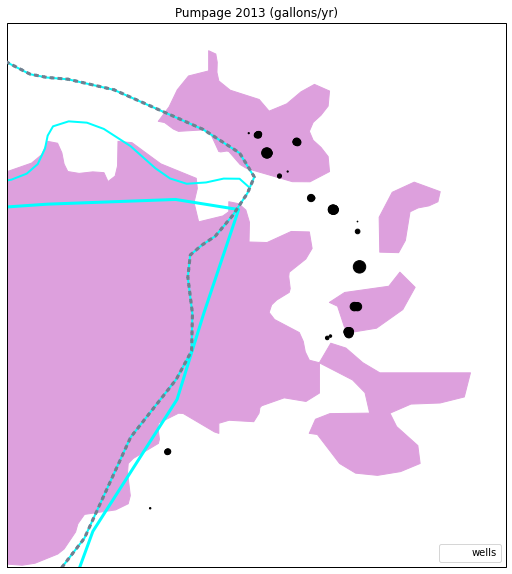

In [128]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xlim(minlong,maxlong)
ax.set_ylim(minlat,maxlat)
states_provinces = cf.NaturalEarthFeature(
    category='cultural', # features are categorized as cultural or physical
    name='admin_1_states_provinces', # name of shapefile
    scale='10m', # scale of features
    facecolor='none')	
largerivers = cf.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='110m', # major rivers
    facecolor='none')
smallrivers = cf.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines_scale_rank',
    scale='10m', # smaller rivers
    facecolor='none')   
popplaces = cf.NaturalEarthFeature(
    category='cultural',
    name='urban_areas', # plots municipal boundaries
    scale='10m',
    facecolor='plum') 
# adds the features defined above
sz=(df['2013'].values/500000)
plt.scatter(df2['Latitude'],df2['Longitude'],sz, marker=".", color="black", label="wells",zorder=3)
ax.add_feature(popplaces,edgecolor='plum',linewidth=1.0, zorder=1)
ax.add_feature(largerivers,edgecolor='aqua',linewidth=3.0, zorder=2)
ax.add_feature(smallrivers,edgecolor='aqua',linewidth=2.0, zorder=2)
ax.add_feature(states_provinces, edgecolor='slategray', linewidth=3.0,linestyle=':', zorder=3)

plt.legend(loc='lower right')
plt.fill()
plt.title('Pumpage 2013 (gallons/yr)')
plt.show()